In [1]:
from constants import *
from scripts.scripts import *
from scripts.gdal_scripts import *

In [2]:
main_name = "test_grid02" # name of csv file.
file = gdal_open_shp(shp_name=main_name)
gdal_print_first_feature(file=file)
print("")
gdal_print_metadata(tif_name="test_grid02")    

{"type": "Feature", "geometry": {"type": "Point", "coordinates": [9.065843041, 56.83518536]}, "properties": {"lat": 56.83518536, "lon": "9.065843041", "value": 100}, "id": 1}

Driver: GTiff/GeoTIFF
Files: tif_files/test_grid02.tif
Size is 256, 256
Origin = (9.065843041000001,56.834808879999997)
Pixel Size = (0.000002829859375,0.000001506484375)
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (   9.0658430,  56.8348089) 
Lower Left  (   9.0658430,  56.8351945) 
Upper Right (   9.0665675,  56.8348089) 
Lower Right (   9.0665675,  56.8351945) 
Center      (   9.0662053,  56.8350017) 
Band 1 Block=256x16 Type=Int16, ColorInterp=Gray



In [6]:
tif_name = gdal_run_invdist(
    input_shp_name=main_name,
    target_column="value",
    output_tif_name=main_name,
    power=4,
    min_points=1,
    output_res=(128,128)
)

Options:  ['-of', 'Gtiff', '-ot', 'Byte', '-a', 'invdist:power=4:min_points=1', '-zfield', 'value', '-tr', '128', '128']
Running interpolation on: shapefiles/test_grid02.shp.zip
Saving to: tif_files/test_grid02-invdist-4-None-None-None-None-0-1.tif


In [7]:
gdal_print_metadata(tif_name=tif_name)

Driver: GTiff/GeoTIFF
Files: tif_files/test_grid02-invdist-4-None-None-None-None-0-1.tif
Size is 256, 256
Origin = (9.065843041000001,56.834808879999997)
Pixel Size = (0.000002829859375,0.000001506484375)
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (   9.0658430,  56.8348089) 
Lower Left  (   9.0658430,  56.8351945) 
Upper Right (   9.0665675,  56.8348089) 
Lower Right (   9.0665675,  56.8351945) 
Center      (   9.0662053,  56.8350017) 
Band 1 Block=256x32 Type=Byte, ColorInterp=Gray



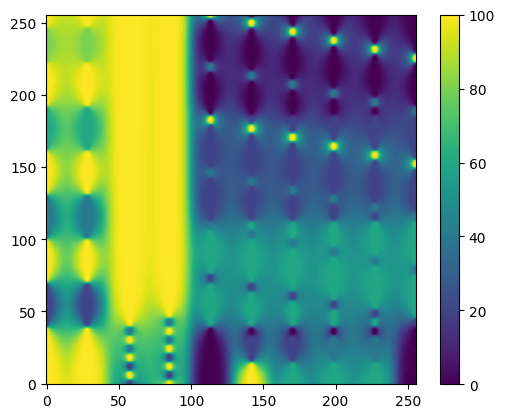

In [6]:
plot_raster(tif_name=tif_name)